In [14]:
import pandas as pd
import numpy as np
import datetime
from ephem import Moon
import seaborn as sns

In [2]:
fname = "data/orig_src/Africa_1997-2020_Feb08.xlsx"
df = pd.read_excel(fname)

In [3]:
df.keys()

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')

In [8]:
dates = df['EVENT_DATE']


In [9]:
dates

0        1997-01-01
1        1997-01-02
2        1997-01-03
3        1997-01-04
4        1997-01-05
            ...    
202052   2020-01-28
202053   2020-01-31
202054   2020-02-02
202055   2020-02-02
202056   2020-02-06
Name: EVENT_DATE, Length: 202057, dtype: datetime64[ns]

In [11]:
phases = np.zeros(dates.size)
for idx, date in enumerate(dates):
    m = Moon(date)
    phases[idx] = m.moon_phase

In [12]:
phases

array([0.60490876, 0.50946874, 0.41114836, ..., 0.49480002, 0.49480002,
       0.86185671])

In [13]:
df['Moon_phase'] = phases

In [17]:
df['FATALITIES_normed'] = (df['FATALITIES'] - df['FATALITIES'].mean()) / df['FATALITIES'].std()

In [20]:
df2000 = df[df['YEAR'] == 2000]
df2000.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,Moon_phase,FATALITIES_normed
255,12,ALG256,256,2000-01-02,2000,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,36.590,2.448,1,Reuters,International,Jan 4 (Reuters) - Radical Moslem rebels shot d...,6,1552577666,0.191606,0.071038
256,12,ALG257,257,2000-01-04,2000,1,Battles,Armed clash,Police Forces of Algeria (1999-),NaN,...,36.165,1.334,1,All Africa,Regional,11 Jan 2000 BBC Mon-three militants were kille...,3,1552577666,0.067989,-0.016531
257,12,ALG258,258,2000-01-04,2000,1,Battles,Armed clash,Military Forces of Algeria (1999-),NaN,...,35.376,1.313,1,All Africa,Regional,12 Jan 2000 BBC Mon-The military offensive tha...,1,1552577666,0.067989,-0.074910
258,12,ALG259,259,2000-01-05,2000,1,Battles,Armed clash,Military Forces of Algeria (1999-),NaN,...,35.376,1.313,1,All Africa,Regional,12 Jan 2000 BBC Mon-The military offensive tha...,1,1552577666,0.028386,-0.074910
259,12,ALG260,260,2000-01-06,2000,1,Battles,Armed clash,Military Forces of Algeria (1999-),NaN,...,35.376,1.313,1,All Africa,Regional,12 Jan 2000 BBC Mon-The military offensive tha...,1,1552577666,0.005611,-0.074910


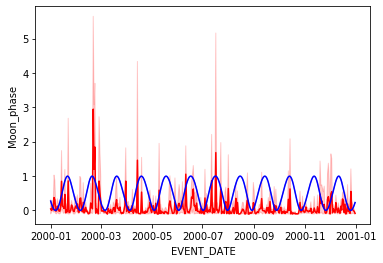

In [21]:
sns.lineplot(x='EVENT_DATE', y='FATALITIES_normed', data=df2000, color='red')
sns.lineplot(x='EVENT_DATE', y='Moon_phase', data=df2000, color='blue')

In [22]:
df2005 = df[df['YEAR'] == 2005]

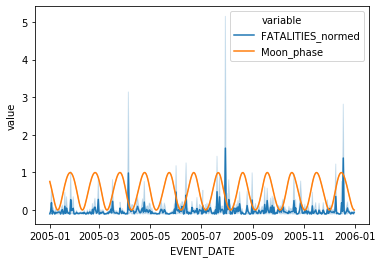

In [36]:
df_plot = df2005[['EVENT_DATE', 'FATALITIES_normed', 'Moon_phase']]
sns_fig = sns.lineplot(x='EVENT_DATE', y='value', hue='variable', data=pd.melt(df_plot, ['EVENT_DATE']))
fig = sns_fig.get_figure()
fig.savefig('test.pdf')

In [55]:
for year in df['YEAR'].unique():
    print(year)
    df_tmp = df[df['YEAR'] == year]
    
    #df_tmp = df_tmp[df_tmp['COUNTRY'] == 'Angola']
    #print(df_tmp.keys())
    #corr1 = df_tmp.corr(method='pearson')
    #print(np.abs(corr1['Moon_phase'].sort_values(ascending=False)))
    #corr2 = df_tmp.corr(method='kendall')
    #print(np.abs(corr2['Moon_phase'].sort_values(ascending=False)))
    #corr3 = df_tmp.corr(method='spearman')
    #print(np.abs(corr3['Moon_phase'].sort_values(ascending=False)))
    
    df_plot = df_tmp[['EVENT_DATE', 'FATALITIES_normed', 'Moon_phase']]
    sns_fig = sns.lineplot(x='EVENT_DATE', y='value', hue='variable', data=pd.melt(df_plot, ['EVENT_DATE']))
    sns_fig.set(ylim=(-.5, 25.))
    fig = sns_fig.get_figure()
    fname = "plots/fatalities_vs_moon_year{:}.pdf".format(year)
    fig.savefig(fname)
    fig.clear()

1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


<Figure size 432x288 with 0 Axes>